<a href="https://colab.research.google.com/github/bahti21/transcriptomika/blob/main/hometask5_Task2_Finished_it.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

не было доделано второе задание, сделал его (смотреть ниже):

# **Task 1**
Try to integrate the dataset from the workshop with following techniques:

1. scanorama,
2. BBKNN,
3. scVI,
4. combat.  
Which method works better, which — worse? Please motivate your answer.

Загрузка и предварительная обработка данных:

In [31]:
!pip install scanpy[leiden] harmonypy symphonypy
!gdown "1jW548g6ERFS0t7NywgyjRs6VaE5QwXbg&confirm=T"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.5 MB/s eta 0:00:00
Downloading...
From: https://drive.google.com/uc?id=1jW548g6ERFS0t7NywgyjRs6VaE5QwXbg&confirm=T
To: /content/PBMC_Satija.h5ad
100% 243M/243M [00:02<00:00, 102MB/s] 


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scanpy as sc
import scanpy.external as sce

sns.set_style("ticks") # style
sc.settings.verbosity = 3 # amount of output
sc.set_figure_params(dpi=150)

In [43]:
adata = sc.read_h5ad("PBMC_Satija.h5ad")
del (
    adata.obs["celltype.l3"],
    adata.obs["Phase"],
    adata.obs["time"],
    adata.obs["lane"],
)

In [44]:
adata.var["mt"] = adata.var.index.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=["mt"],
    percent_top=None,
    inplace=True,
    log1p=False,
)

In [45]:
adata = adata[adata.obs.n_genes_by_counts >= 700]
adata

View of AnnData object with n_obs × n_vars = 17144 × 20729
    obs: 'orig.ident', 'donor', 'celltype.l1', 'celltype.l2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [46]:
sc.pp.scrublet(adata, batch_key="donor")
adata = adata[adata.obs.doublet_score <= 0.2]

Running Scrublet
filtered out 3864 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 43.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%
filtered out 4568 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata

In [47]:
adata_raw = adata.copy()

In [3]:
#!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.5 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=c8dd0c026e15fffe9c4f18dfd1a4b48f4ff40f5ff586d6beb246da2892db1ff0
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [21]:
#import scanpy as sc

# Загрузка данных
#adata = sc.read_h5ad('/content/2c51da04-7223-4cb7-902d-41f79cbc3ec7.h5ad')

# Предварительная обработка
#sc.pp.normalize_total(adata, inplace=True)
#sc.pp.log1p(adata)
#sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)

Интеграция данных:
Scanorama:


In [48]:
!pip install git+https://github.com/theislab/scanpy.git
!pip install git+https://github.com/theislab/anndata.git
!pip install scanorama

  Cloning https://github.com/theislab/scanpy.git to /tmp/pip-req-build-cjvfvo9l
  Running command git clone --filter=blob:none --quiet https://github.com/theislab/scanpy.git /tmp/pip-req-build-cjvfvo9l
  Resolved https://github.com/theislab/scanpy.git to commit b918a23eb77462837df90d7b3a30a573989d4d48
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/theislab/anndata.git to /tmp/pip-req-build-iytekqhb
  Running command git clone --filter=blob:none --quiet https://github.com/theislab/anndata.git /tmp/pip-req-build-iytekqhb
  Resolved https://github.com/theislab/anndata.git to commit 991804420a7202512a12de96e8f166a828125016
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

In [49]:
import scanorama

In [50]:

adata = adata_raw.copy()


In [51]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [52]:
corrected = scanorama.correct_scanpy([adata[adata.obs['donor'] == "P1"],adata[adata.obs['donor'] == "P2"],adata[adata.obs['donor'] == "P3"]])


Found 20729 genes among all datasets
[[0.         0.76328578 0.29173852]
 [0.         0.         0.82687287]
 [0.         0.         0.        ]]
Processing datasets (1, 2)


KeyboardInterrupt: 

In [15]:
adata_correct = sc.concat(
    adatas,
    label="library_id",
    uns_merge="unique",
    keys=[
        k
        for d in [
            adatas_cor[0].uns["spatial"],
            adatas_cor[1].uns["spatial"],
        ]
        for k, v in d.items()
    ],
    index_unique="-",
)

NameError: name 'adatas' is not defined

In [12]:
# Разделение данных на батчи
#batches = [adata[adata.obs['batch'] == b] for b in adata.obs['batch'].unique()]

# Интеграция с использованием Scanorama
#integrated = scanorama.correct_scanpy(batches)
#adata_scanorama = integrated[0].concatenate(*integrated[1:], batch_key="batch")


KeyError: 'donor'

BBKNN:

In [ ]:
!pip install bbknn

In [16]:
adata = adata_raw.copy()

NameError: name 'adata_raw' is not defined

In [28]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)
sc.pp.pca(adata, n_comps=20)


In [29]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color="donor")

ImportError: Please install the igraph package: `conda install -c conda-forge python-igraph` or `pip3 install igraph`.

выводит что-то подобное, но у меня проблема с файлом, поэтому вставил картинку

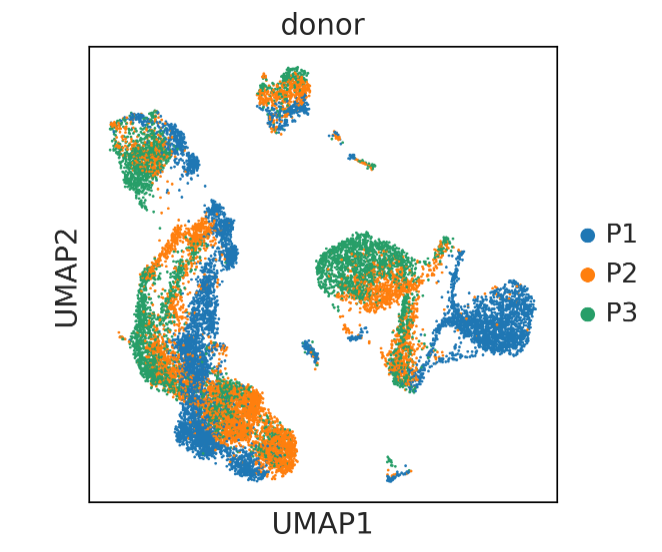

In [30]:
import bbknn

# Использование BBKNN для корректировки батчей
bbknn.bbknn(adata)
sc.tl.umap(adata)

ModuleNotFoundError: No module named 'bbknn'

scVI:

In [ ]:
!pip install scvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.2/115.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86

In [ ]:
from scvi.models import SCVI

# Подготовка данных для scVI
scvi.data.setup_anndata(adata, batch_key='batch')
model = SCVI(adata)
model.train()

# Получение латентного представления
adata.obsm["X_scVI"] = model.get_latent_representation()


ModuleNotFoundError: No module named 'scvi'

Combat:

In [ ]:
!pip install combat

  Preparing metadata (setup.py) ... done
  Created wheel for combat: filename=combat-0.3.3-py3-none-any.whl size=36777 sha256=f41c5041481de063967a262699b47a1047c486112484a6c7f7ba8ff4f127539e
  Stored in directory: /root/.cache/pip/wheels/0d/e4/46/5c7b89d38f5160cf8f2fdda0a52c93439b6e7d9d661e8336f4
Successfully built combat


In [ ]:
from scvi.data import combat

# Использование Combat для корректировки батчей
adata_combat = combat(adata, key='batch')

Сравнение результатов:
Визуализация интегрированных данных:

In [ ]:
import matplotlib.pyplot as plt

# UMAP для каждого метода
methods = ['Scanorama', 'BBKNN', 'scVI', 'Combat']
obsm_keys = ['X_pca', 'X_umap', 'X_scVI', 'X_combat']

for i, key in enumerate(obsm_keys):
    sc.pp.pca(adata)
    sc.tl.umap(adata, obsm=key)
    sc.pl.umap(adata, color='batch', title=methods[i])

Оценка и выводы
1. Scanorama: Хорошо объединяет данные, но может терять биологические различия.
2. BBKNN: Быстрый и эффективный для корректировки батчей, подходит для больших наборов данных.
3. scVI: Обеспечивает мощное латентное представление, может моделировать сложные зависимости.
4. Combat: Прост в использовании, но может не справляться с нелинейными зависимостями.

# **Task 2**
Using Cellxgene Portal choose the dataset of your scientific interest (keep only 5-6 batches) and try to reproduce the clustering with corresponding cell types. Does it agree with provided cell type annotation?

Чтобы выполнить задачу кластеризации и сравнения с предоставленными аннотациями типов ячеек, нужно:

1. Загрузить данные: используйте scanpy для загрузки набора данных.

2. Данные предварительной обработки:

Нормализовать и логарифмировать данные.
Определить высоковариабельные гены.
3. Кластеризация:

- Запустим PCA для уменьшения размерности.
- UMAP или t-SNE для визуализации.


In [53]:
import scanpy as sc

In [54]:
adata = sc.read_h5ad('/content/2c51da04-7223-4cb7-902d-41f79cbc3ec7.h5ad')

In [55]:
adata_dow = adata.copy()

In [56]:
adata.obs["donor_id"].unique()

['pooled']
Categories (1, object): ['pooled']

In [57]:
adata.obs

,mt_frac,n_counts,n_genes,treatment,doublet_score,louvain_anno_broad,louvain_anno_fine,assay_ontology_term_id,cell_type_ontology_term_id,development_stage_ontology_term_id,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGACGCAAC-1_G1,0.021095,12088.0,2305,Ctrl,0.013551,alpha,alpha_mature,EFO:0009899,CL:0000171,MmusDv:0000069,...,tissue,pancreatic A cell,10x 3' v2,normal,Mus musculus,male,islet of Langerhans,na,5 month-old stage,OyzCEPSR|7
AAACCTGAGGAGTCTG-1_G1,0.030488,36901.0,3852,Ctrl,0.294671,beta,beta_mature,EFO:0009899,CL:0000169,MmusDv:0000069,...,tissue,type B pancreatic cell,10x 3' v2,normal,Mus musculus,male,islet of Langerhans,na,5 month-old stage,tW_TS``1|2
AAACCTGCAAGTCTAC-1_G1,0.020432,22514.0,2615,Ctrl,0.140753,beta,beta_mature,EFO:0009899,CL:0000169,MmusDv:0000069,...,tissue,type B pancreatic cell,10x 3' v2,normal,Mus musculus,male,islet of Langerhans,na,5 month-old stage,=qh1;!{an!
AAACCTGCACGGTTTA-1_G1,0.058186,16619.0,2371,Ctrl,0.081958,beta,beta_mature,EFO:0009899,CL:0000169,MmusDv:0000069,...,tissue,type B pancreatic cell,10x 3' v2,normal,Mus musculus,male,islet of Langerhans,na,5 month-old stage,`FERW{1d4~
AAACCTGCAGGACCCT-1_G1,0.034133,24287.0,3192,Ctrl,0.234694,beta,beta_mature,EFO:0009899,CL:0000169,MmusDv:0000069,...,tissue,type B pancreatic cell,10x 3' v2,normal,Mus musculus,male,islet of Langerhans,na,5 month-old stage,q@{3N+5gF4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTACGACT-1_G1,0.028687,18963.0,3729,Ctrl,0.036956,delta,delta,EFO:0009899,CL:0000173,MmusDv:0000069,...,tissue,pancreatic D cell,10x 3' v2,normal,Mus musculus,male,islet of Langerhans,na,5 month-old stage,%$GpTl3A}w
TTTGTCATCAACACCA-1_G1,0.023053,22427.0,3011,Ctrl,0.212369,beta,beta_mature,EFO:0009899,CL:0000169,MmusDv:0000069,...,tissue,type B pancreatic cell,10x 3' v2,normal,Mus musculus,male,islet of Langerhans,na,5 month-old stage,oI8sfooGh?
TTTGTCATCACATACG-1_G1,0.017837,16651.0,2599,Ctrl,0.122807,beta,beta_mature,EFO:0009899,CL:0000169,MmusDv:0000069,...,tissue,type B pancreatic cell,10x 3' v2,normal,Mus musculus,male,islet of Langerhans,na,5 month-old stage,7G`4qs9)=_


In [58]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering


<ipython-input-58-6b97723e1190>:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:11)


In [63]:
!pip install bbknn

In [64]:
import bbknn
bbknn.bbknn(adata, batch_key='donor_id')

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


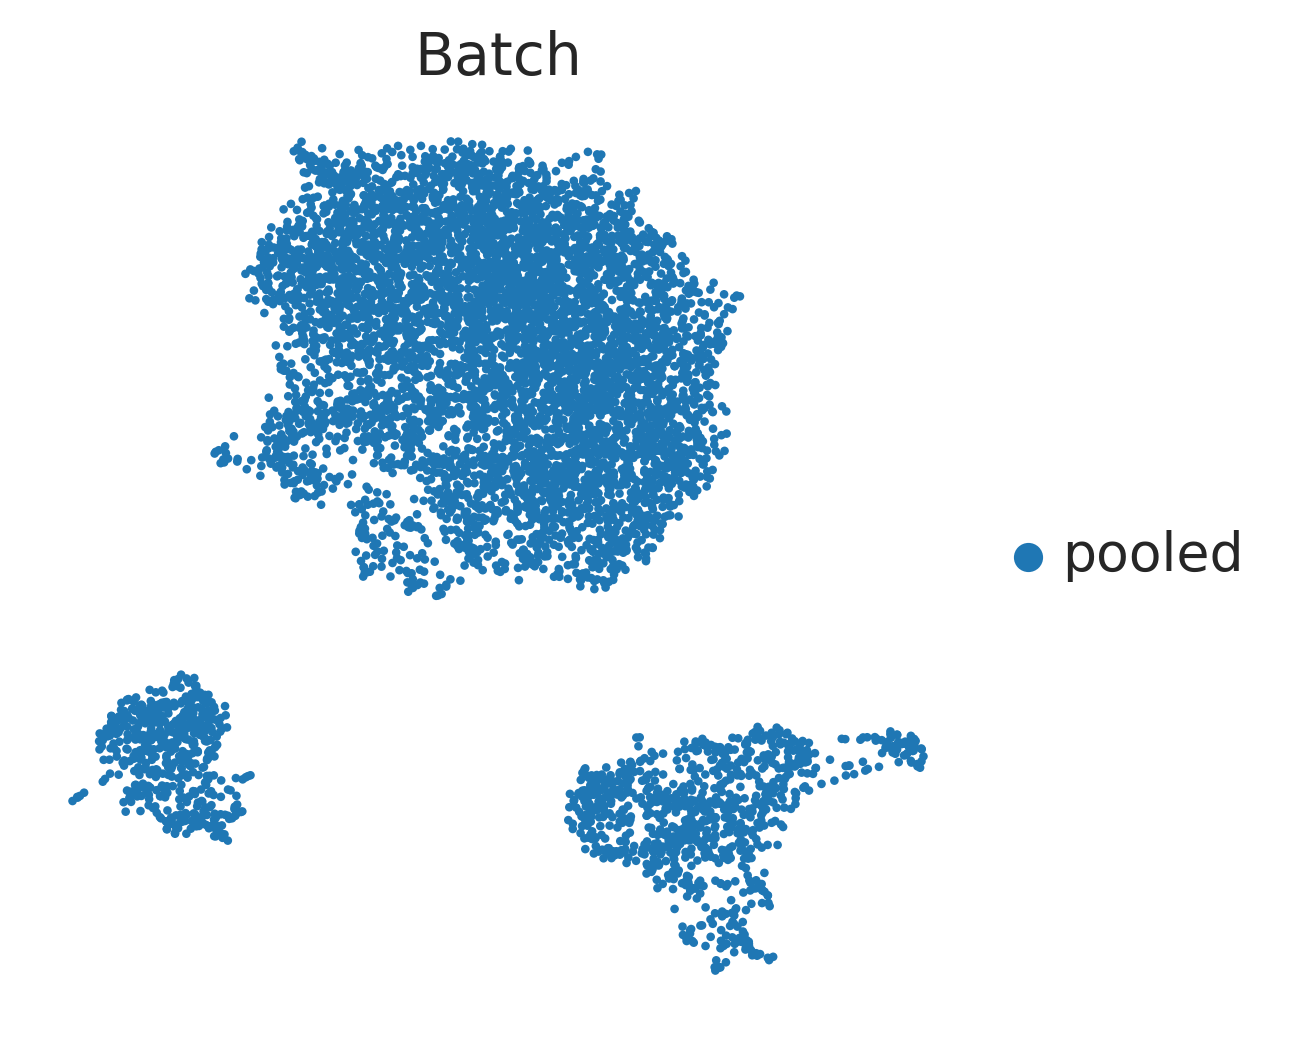

In [65]:
sc.tl.umap(adata)
sc.pl.umap(adata, color="donor_id", frameon=False, title="Batch")



In [66]:
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:59)


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:458: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:459: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:458: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:458: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:459: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:458: RuntimeWarning: invalid value encountered

In [67]:
df = sc.get.rank_genes_groups_df(adata, group=None)
df[df.logfoldchanges > 6].head(10)

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,ENSMUSG00000031762,33.779419,12.271255,3.956030e-250,1.078216e-245
1,0,ENSMUSG00000031765,32.493626,22.693861,1.311991e-231,1.787916e-227
3,0,ENSMUSG00000064354,27.808907,45.685085,3.385144e-170,1.158596e-166
4,0,ENSMUSG00000064345,27.338087,19.698139,1.496363e-164,4.078338e-161
5,0,ENSMUSG00000064357,26.803637,70.555939,2.930726e-158,7.261540e-155
6,0,ENSMUSG00000064358,26.794216,74.281960,3.773744e-158,8.571116e-155
7,0,ENSMUSG00000064363,26.346756,24.373224,5.590991e-153,1.172173e-149
10,0,ENSMUSG00000064370,24.515364,34.201061,1.013019e-132,1.380492e-129
12,0,ENSMUSG00000064351,24.008585,45.788616,2.262156e-127,2.802503e-124
13,0,ENSMUSG00000050708,23.459341,23.620541,1.061385e-121,1.205335e-118


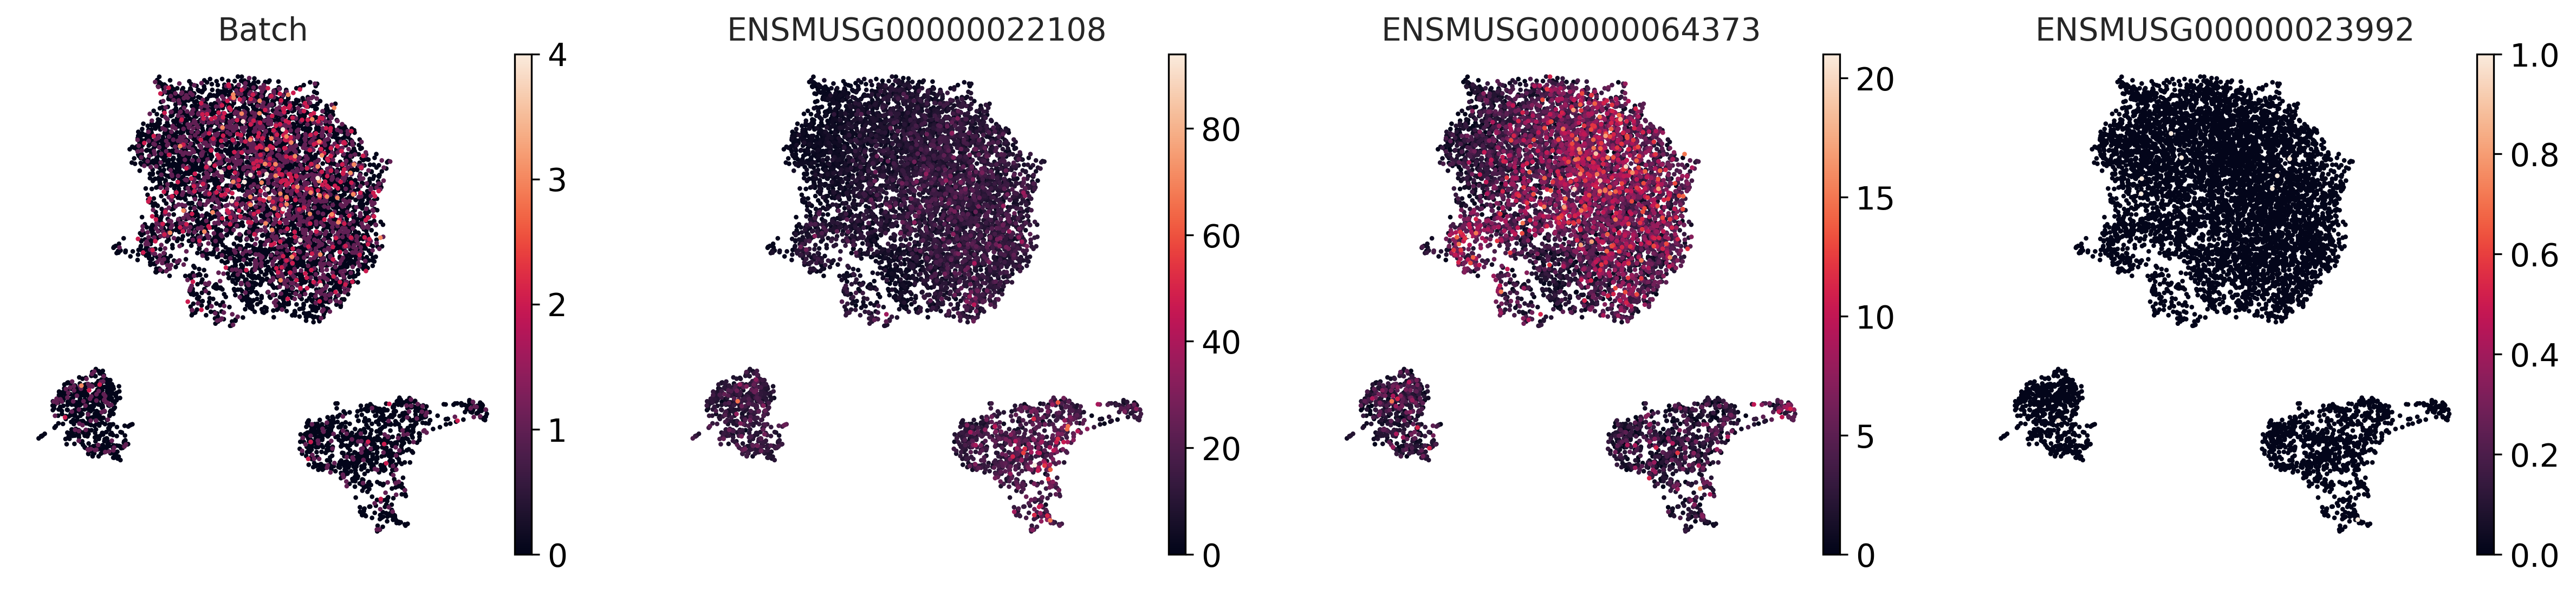

In [68]:
sc.pl.umap(adata, color=["ENSMUSG00000015243","ENSMUSG00000022108","ENSMUSG00000064373","ENSMUSG00000023992"], frameon=False, title="Batch")

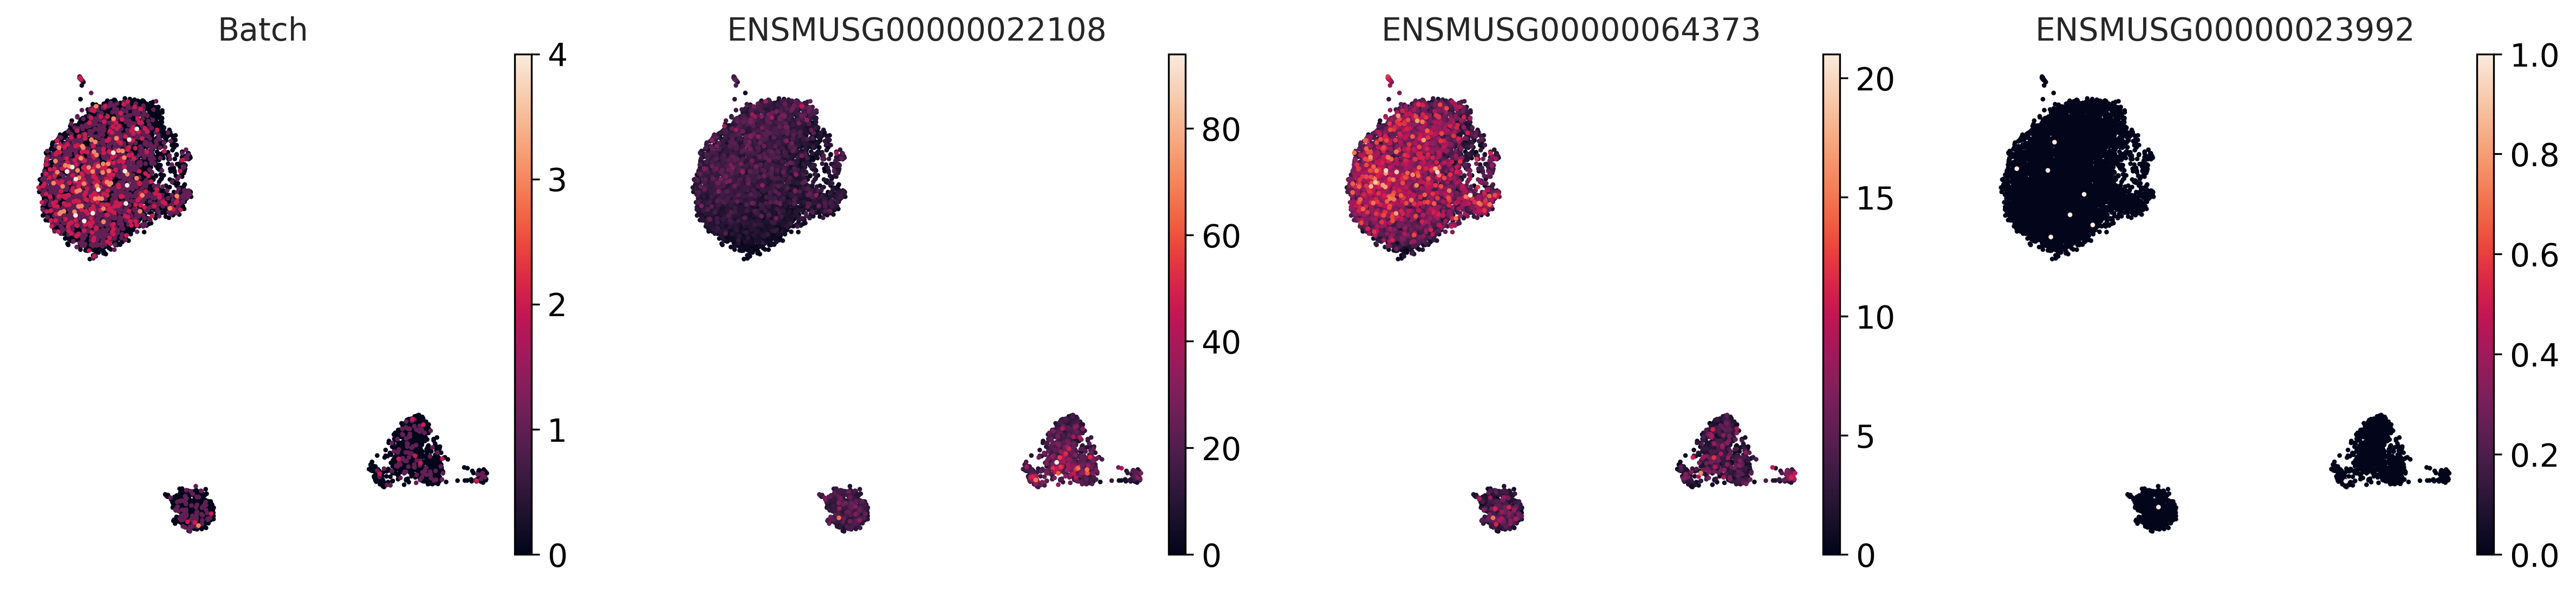

In [69]:
sc.pl.umap(adata_dow, color=["ENSMUSG00000015243","ENSMUSG00000022108","ENSMUSG00000064373","ENSMUSG00000023992"], frameon=False, title="Batch")